In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Neste arquivo vamos carregar a fonte de dados e examina-la a fim de encontrar inconformidades que precisam ser tratadas para que o processamento possa ser efetivo

In [17]:
df= pd.read_csv(r'C:\cognitivo\winequality.csv',sep=';')

In [18]:
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


O primeiro passo é averiguar se existem campos nulos ou vazios

In [20]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

A coluna type deverá ser alterada para refletir a categorização sem utilizar caracteres alfa.
Como São apenas duas categorias, utilizarei 0 e 1, porém para categorias  maiores esta estratégia tem que ser diferente.

In [21]:
# iterate over the dataframe row by row
df.loc[df['type'] == 'Red', 'type'] = 1
df.loc[df['type'] == 'White', 'type'] = 0

Fazemos uma operação de média então para averiguar se alguma variável possui campos alfanumericos por exemplo. Caso aconteça 
a média não seria calculada.

In [23]:
df.groupby('type').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
type,,,,,,,,,,,
0,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,1.548363,3.188267,0.489847,5.877909
1,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,2.208702,3.311113,0.658149,5.636023


Executaremos uma função agora para averguar os outliers da massa de dados

In [24]:
for item in df.columns:
    print(item)
    q = df[item].quantile(0.99)
    print(q)
    print("")

type
1.0

fixed acidity
12.0

volatile acidity
0.88

citric acid
0.74

residual sugar
18.2

chlorides
0.18615999999999988

free sulfur dioxide
77.0

total sulfur dioxide
238.0

density
10.008

pH
3.64

sulphates
0.99

alcohol


TypeError: can't multiply sequence by non-int of type 'float'

Encontramos um problema com o campo alcohol:
    Foi encontrado 40 registros preenchidos com os caracteres semelhantes ao seguinte padrão:
    128.933.333.333.333
    128.933.333.333.333
    114.666.666.666.667
    100.333.333.333.333
    114.333.333.333.333
    105.333.333.333.333
    953.333.333.333.333
    109.333.333.333.333
    109.333.333.333.333
    113.666.666.666.667
    113.333.333.333.333
    110.666.666.666.667
    113.333.333.333.333
    Este evento foi tratado selecionando os registros conformes, calculando a média dos mesmos e preenchendo os campos desformatados com a média dos campos conformes.
    Este trabalho foi feito fora do python no Micorsoft Excel, o resultado salvo em uma planilha será imputado daqui para frente.


In [25]:
wq=pd.read_excel(r'C:\cognitivo\winecorrect.xlsx')

o Novo arquivo precisa receber a categorização correta:

In [27]:
wq.loc[wq['type'] == 'Red', 'type'] = 1
wq.loc[wq['type'] == 'White', 'type'] = 0

In [28]:
wq.head(5)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1001.0000,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Procurando pistas sobre as variáveis mais importantes, executaremos então a análise de correlação. O arquivo resultante foi salvo com o nome de winecorrelation.xlsx.

Text(0.5, 1, 'Tabela de correlação')

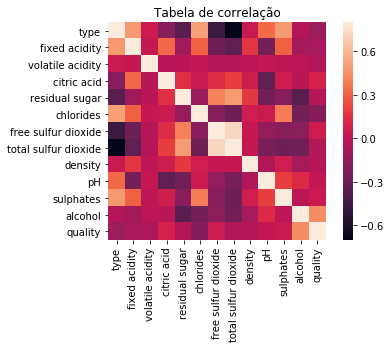

In [29]:
data_corr = wq.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Tabela de correlação")

Consideramos terminada a Análise preliminar, salvamos os arquivos, primeiramente a correlação, depois a massa de dados tratada.

In [30]:
data_corr.to_excel(r'C:\cognitivo\winecorrelation.xlsx')

In [31]:
wq.to_csv(r'C:\cognitivo\winecorreto.csv',sep=';')